In [1]:
from loess import loess_1d
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Coding3_Data.csv')

In [21]:
def smoother_diags(x, span):
    n = len(x)
    lev = np.zeros(n)
    for i in range(0, n):
        y = np.zeros(n)
        y[i] = 1
        loess_mod = loess.loess(x, y, span=span)
        loess_mod.fit()
        yi = loess_mod.outputs.fitted_values
        #_, yi, _ = loess_1d.loess_1d(x, y, degree=2, frac=span)
        #yi = interpolate.UnivariateSpline(x, y, s=span)(x)
        lev[i] = yi[i]
    return lev

In [22]:
def onestep_CV(x, y, span):
    n = len(x)
    xhat, yhat, weights = loess_1d.loess_1d(x, y, degree=2, frac=span)
    r = y - yhat
    Slam_diags = smoother_diags(x, span)
    cv = (r / (1 - Slam_diags))**2
    #for i, s in enumerate(Slam_diags):
    #    cv.append((r[i] / (1 - s))**2)
    
    d = 1 - (np.sum(Slam_diags) / n)
    gcv = (r / d)**2
    
    return (np.mean(cv), np.mean(gcv))
    
   

In [23]:
 def loocv(x, y, spans):
    m = len(spans)
    cv = np.zeros(m)
    gcv = np.zeros(m)
    
    for i in range(0, m):
        cv[i], gcv[i] = onestep_CV(x, y, spans[i])
        #cv[i] = tmp[0]
        #gcv[i] = tmp[1]
    return (cv, gcv)
    
    

In [24]:
spans = np.linspace(0.20, 0.90, 15)
cv, gcv = loocv(df['x'].values, df['y'].values, spans)

In [25]:
print(f"CV: {cv}")
best_idx = np.where(cv == np.min(cv))[0][0]
print(f"Optimum span for CV: {spans[best_idx]}")
print(f"GCV: {gcv}")
best_idx = np.where(gcv == np.min(gcv))[0][0]
print(f"Optimum span for GCV: {spans[best_idx]}")

CV: [9.89299689 7.06503829 1.47837861 1.18586453 1.02827028 1.07504775
 0.99612172 1.18139796 1.15985075 1.22678074 1.17415952 1.31905324
 1.33111411 1.67517006 1.74127863]
Optimum span for CV: 0.5
GCV: [1.89102353 1.84714983 1.24626756 1.18377115 1.01997258 1.04276341
 0.98137302 1.15975456 1.14224452 1.18376484 1.13931296 1.275974
 1.28628141 1.60774329 1.6744516 ]
Optimum span for GCV: 0.5


In [30]:
import skmisc
from skmisc import loess

In [31]:
loess_mod = loess.loess(df['x'].values, df['y'].values, span=0.5)
loess_mod.fit()

In [32]:
loess_pred = loess_mod.predict(df['x'].values)

In [3]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [6]:
lw = lowess(df['y'], df['x'], frac=0.5)

In [7]:
lw

array([[ 0.00949576,  1.22037648],
       [ 0.03999592,  0.67250128],
       [ 0.04577026,  0.57096942],
       [ 0.11370341, -0.61649033],
       [ 0.159046  , -1.55429616],
       [ 0.18672279, -1.75009139],
       [ 0.21879954, -1.73735008],
       [ 0.23222591, -1.70795354],
       [ 0.23255051, -1.70713354],
       [ 0.26682078, -1.59556799],
       [ 0.28273358, -1.50201264],
       [ 0.28622328, -1.47843982],
       [ 0.29231584, -1.42757946],
       [ 0.30269337, -1.32981883],
       [ 0.31661245, -1.15553819],
       [ 0.51425114, -0.01934632],
       [ 0.52569755, -0.11992529],
       [ 0.54497484, -0.08506521],
       [ 0.60927473, -0.88454064],
       [ 0.6222994 , -0.95071457],
       [ 0.62337944, -0.95707274],
       [ 0.64031061, -1.05159118],
       [ 0.66608376, -1.17837055],
       [ 0.69359129, -1.2887745 ],
       [ 0.81059855, -0.71201272],
       [ 0.83134505, -0.57351636],
       [ 0.83729563, -0.53351985],
       [ 0.86091538, -0.37413447],
       [ 0.91465817,

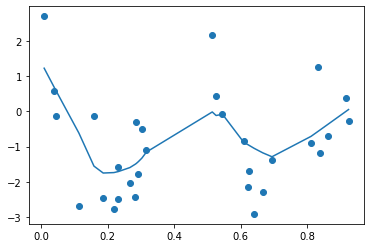

In [11]:
plt.scatter(df['x'], df['y'])
plt.plot(lw[:,0], lw[:,1])

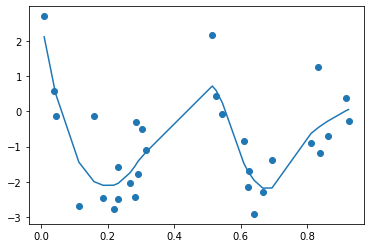

In [33]:
plt.scatter(df['x'], df['y'])
_, ys, _ = loess_1d.loess_1d(df['x'].values, df['y'].values, degree=2, frac=0.5)
plt.plot(df['x'], loess_pred.values)

In [12]:
smoother_diags(df['x'].values, 0.5)

array([0.46612683, 0.45372495, 0.47998589, 0.44454581, 0.4784674 ,
       0.42007714, 0.44881875, 0.47312524, 0.47746372, 0.43688882,
       0.43769686, 0.44991839, 0.40521955, 0.47223105, 0.49246587,
       0.4548877 , 0.45756098, 0.4356133 , 0.41239732, 0.4885824 ,
       0.45118575, 0.38992937, 0.43930521, 0.43968243, 0.423687  ,
       0.44605865, 0.47414202, 0.40657462, 0.46938117, 0.46424654])